In [46]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings



In [47]:
!pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from twython import Twython

CONSUMER_KEY = '0pJRCT1emkOcrtxHl7lMN4N5A'
CONSUMER_SECRET ='IS4Gxcx1aQ1c5Hyei5PSePLS37IcVmYBT8Qt1t4IOxmLIxJD42'

twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

In [49]:
results = twitter.search( q="Ukraine", count=100)

type(results)

dict

In [50]:
results

{'statuses': [{'created_at': 'Tue Aug 16 11:12:32 +0000 2022',
   'id': 1559498339330232320,
   'id_str': '1559498339330232320',
   'text': 'RT @GerdaGartner: UKRAINE-DIPLOMATEN verursachen in Wien VOLL BESOFFEN einen Unfall und werden vermutlich dafür nicht bestraft!🇺🇦🤮😡 https:/…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'GerdaGartner',
      'name': 'FRAU MAYER',
      'id': 1284530222138785792,
      'id_str': '1284530222138785792',
      'indices': [3, 16]}],
    'urls': []},
   'metadata': {'iso_language_code': 'de', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1441814166134681604,
    'id_str': '1441814166134681604',
    'name': 'Ben NoaC

In [51]:
all_items = results['statuses']

In [52]:
tweet_df = pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities
0,Tue Aug 16 11:12:32 +0000 2022,1559498339330232320,1559498339330232320,RT @GerdaGartner: UKRAINE-DIPLOMATEN verursach...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,57,0,False,False,de,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 16 11:12:32 +0000 2022,1559498338621423616,1559498338621423616,RT @tomiahonen: Tom Barrack Aug Thread 2/\n\nD...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,191,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Tue Aug 16 11:12:32 +0000 2022,1559498337056919552,1559498337056919552,The illegal #Russian occupation of #Ukraine is...,True,"{'hashtags': [{'text': 'Russian', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,0,False,False,en,1.559425e+18,1559425122825654272,{'created_at': 'Tue Aug 16 06:21:36 +0000 2022...,False,NaN
3,Tue Aug 16 11:12:31 +0000 2022,1559498334905454592,1559498334905454592,"RT @texun007: 特讯，俄军在赫尔松附近“丢下20,000名士兵”\n赫尔松州长说...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'zh', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,97,0,False,False,zh,NaN,NaN,NaN,NaN,NaN
4,Tue Aug 16 11:12:31 +0000 2022,1559498334582235138,1559498334582235138,"RT @shashj: ""Russian troops planned to seize K...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,16,0,False,False,en,NaN,NaN,NaN,NaN,NaN


In [53]:
tweet_user = pd.DataFrame(d['user'] for d in results['statuses'])
tweet_user.head(5)

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,1441814166134681604,1441814166134681604,Ben NoaCH,BenNoaCH3,,Ha,None,{'description': {'urls': []}},False,500,...,333333,True,True,True,False,None,None,None,none,[]
1,1306605448427188232,1306605448427188232,Dr Meaux Dawn Lee,MeauxDawn,South Florida,no DMs she/her #professor #tropicalbiologist #...,None,{'description': {'urls': []}},False,5563,...,333333,True,True,True,False,None,None,None,none,[]
2,757312327452614657,757312327452614657,A. Jamie Saris,jamie_saris,"Maynooth. Kildare, Ireland",I am a medical anthropologist in Ireland. I've...,None,{'description': {'urls': []}},False,2994,...,333333,True,True,True,False,None,None,None,none,[]
3,1108707645903405059,1108707645903405059,正念(澳喜特戰旅) 🌻🌻🌻,yeissactessa,"Sydney, New South Wales",,https://t.co/feKkcQHU5E,{'url': {'urls': [{'url': 'https://t.co/feKkcQ...,False,1766,...,333333,True,False,True,False,None,None,None,none,[]
4,3384594826,3384594826,Carlos Jose Rodriguez Garcia,cjr1171,"Barrio de Salamanca, Madrid","Life, Liberty and the pursuit of Happiness",None,{'description': {'urls': []}},False,42,...,333333,True,False,True,False,None,None,None,none,[]


In [54]:
twitter_df = tweet_df.merge(tweet_user, left_index=True, right_index=True)

### Finding locations of most Tweets

In [55]:
twitter_df.head()

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,Tue Aug 16 11:12:32 +0000 2022,1559498339330232320,1559498339330232320,RT @GerdaGartner: UKRAINE-DIPLOMATEN verursach...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
1,Tue Aug 16 11:12:32 +0000 2022,1559498338621423616,1559498338621423616,RT @tomiahonen: Tom Barrack Aug Thread 2/\n\nD...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
2,Tue Aug 16 11:12:32 +0000 2022,1559498337056919552,1559498337056919552,The illegal #Russian occupation of #Ukraine is...,True,"{'hashtags': [{'text': 'Russian', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
3,Tue Aug 16 11:12:31 +0000 2022,1559498334905454592,1559498334905454592,"RT @texun007: 特讯，俄军在赫尔松附近“丢下20,000名士兵”\n赫尔松州长说...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'zh', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,333333,True,False,True,False,None,None,None,none,[]
4,Tue Aug 16 11:12:31 +0000 2022,1559498334582235138,1559498334582235138,"RT @shashj: ""Russian troops planned to seize K...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,False,True,False,None,None,None,none,[]


In [56]:
twitter_df.shape

(100, 73)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917602 missing from current font.
  font.s

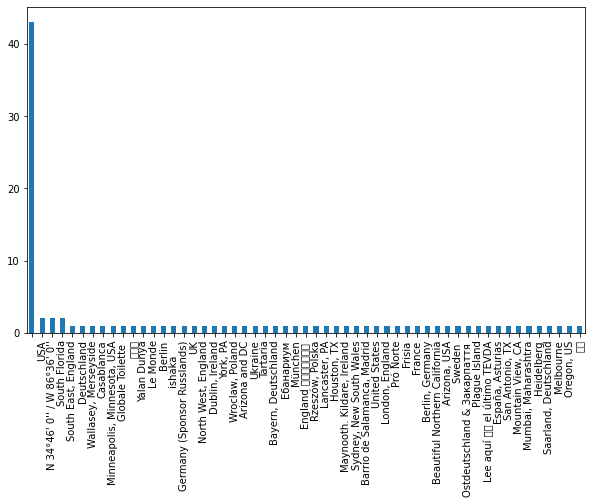

In [57]:
twitter_df.location.value_counts().plot(kind='bar', figsize=(10,6))

### NLP Cleaning Data

In [58]:
df=pd.DataFrame(twitter_df['text'])
df

,text
0,RT @GerdaGartner: UKRAINE-DIPLOMATEN verursach...
1,RT @tomiahonen: Tom Barrack Aug Thread 2/\n\nD...
2,The illegal #Russian occupation of #Ukraine is...
3,"RT @texun007: 特讯，俄军在赫尔松附近“丢下20,000名士兵”\n赫尔松州长说..."
4,"RT @shashj: ""Russian troops planned to seize K..."
...,...
95,RT @JanmRees1: @AndreaNeffi08 @EvaKBartlett If...
96,RT @DubreuilhMarcel: Ce mec et sa clique de na...
97,Ukraine war: Russia blames sabotage for new Cr...
98,RT @jrschlosberg: In response to the 2nd stage...


In [59]:
df["text"]=df["text"].str.lower()
df["text"]=df["text"].str.replace("[^\w\s]","")
df["text"]=df["text"].str.replace("\d+","")
df["text"]=df["text"].str.replace("\n"," ").replace("\r","")

In [60]:
df

,text
0,rt gerdagartner ukrainediplomaten verursachen ...
1,rt tomiahonen tom barrack aug thread donald ...
2,the illegal russian occupation of ukraine is i...
3,rt texun 特讯俄军在赫尔松附近丢下名士兵 赫尔松州长说俄军退路被切断俄军指挥官在乌克...
4,rt shashj russian troops planned to seize kyiv...
...,...
95,rt janmrees andreaneffi evakbartlett if only u...
96,rt dubreuilhmarcel ce mec et sa clique de nazi...
97,ukraine war russia blames sabotage for new cri...
98,rt jrschlosberg in response to the nd stage of...


### Removing stopwords

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
stopwords=stopwords.words('english')

In [63]:
df['text']=df['text'].apply(lambda x : ' '.join(i for i in x.split() if i not in stopwords ))
df

,text
0,rt gerdagartner ukrainediplomaten verursachen ...
1,rt tomiahonen tom barrack aug thread donald tr...
2,illegal russian occupation ukraine deep troubl...
3,rt texun 特讯俄军在赫尔松附近丢下名士兵 赫尔松州长说俄军退路被切断俄军指挥官在乌克...
4,rt shashj russian troops planned seize kyiv th...
...,...
95,rt janmrees andreaneffi evakbartlett ukraines ...
96,rt dubreuilhmarcel ce mec et sa clique de nazi...
97,ukraine war russia blames sabotage new crimea ...
98,rt jrschlosberg response nd stage complaint re...


In [64]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from langdetect import detect
df["language"]=df["text"].apply(detect)
df=df[df["language"] == "en"]
df

,text,language
1,rt tomiahonen tom barrack aug thread donald tr...,en
4,rt shashj russian troops planned seize kyiv th...,en
5,rt flash vasily malyuk acting head sbu igor ta...,en
6,noclador cares ukraine sovereign country weapo...,en
7,rt glasnostgone today europes leaders discusse...,en
...,...,...
91,rt richa saveukrainefmgs fair play ukraine mbb...,en
92,thinkingperson_ zelenskyyua mfa_ukraine mvs_ua...,en
97,ukraine war russia blames sabotage new crimea ...,en
98,rt jrschlosberg response nd stage complaint re...,en


In [66]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,text,language,polarity,subjectivity
1,rt tomiahonen tom barrack aug thread donald tr...,en,0.000000,0.000000
4,rt shashj russian troops planned seize kyiv th...,en,0.178571,0.285714
5,rt flash vasily malyuk acting head sbu igor ta...,en,0.000000,0.000000
6,noclador cares ukraine sovereign country weapo...,en,0.000000,0.000000
7,rt glasnostgone today europes leaders discusse...,en,0.000000,0.000000
...,...,...,...,...
91,rt richa saveukrainefmgs fair play ukraine mbb...,en,0.300000,0.550000
92,thinkingperson_ zelenskyyua mfa_ukraine mvs_ua...,en,0.000000,0.000000
97,ukraine war russia blames sabotage new crimea ...,en,0.136364,0.454545
98,rt jrschlosberg response nd stage complaint re...,en,-0.150000,0.100000


In [67]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [69]:
from nltk.stem import WordNetLemmatizer
df['text'] = df['text'].apply(lambda x: WordNetLemmatizer().lemmatize(x))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,language,polarity,subjectivity
1,rt tomiahonen tom barrack aug thread donald tr...,en,0.000000,0.000000
4,rt shashj russian troops planned seize kyiv th...,en,0.178571,0.285714
5,rt flash vasily malyuk acting head sbu igor ta...,en,0.000000,0.000000
6,noclador cares ukraine sovereign country weapo...,en,0.000000,0.000000
7,rt glasnostgone today europes leaders discusse...,en,0.000000,0.000000
...,...,...,...,...
91,rt richa saveukrainefmgs fair play ukraine mbb...,en,0.300000,0.550000
92,thinkingperson_ zelenskyyua mfa_ukraine mvs_ua...,en,0.000000,0.000000
97,ukraine war russia blames sabotage new crimea ...,en,0.136364,0.454545
98,rt jrschlosberg response nd stage complaint re...,en,-0.150000,0.100000


In [70]:
df.loc[df["subjectivity"] >  0.5, "sentiment"] = 2#"Positive"
df.loc[df["subjectivity"] == 0.5, "sentiment"] = 1#"Neutral"
df.loc[df["subjectivity"] <  0.5, "sentiment"] = 0#"Negative"
df.sample(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,text,language,polarity,subjectivity,sentiment
63,rt ozkaterji ukraine lose war even one three p...,en,0.800000,0.400000,0.0
38,rt officejjsmart airraid alert areas bordering...,en,0.000000,1.000000,2.0
11,rt apmassaro letting berlin dictate pace suppo...,en,-1.000000,1.000000,2.0
91,rt richa saveukrainefmgs fair play ukraine mbb...,en,0.300000,0.550000,2.0
32,rt tulsigabbard bidens sanctions failing russi...,en,0.250000,0.500000,1.0
88,rt officejjsmart video taken several days ago ...,en,-0.033333,0.033333,0.0
19,rt apmassaro letting berlin dictate pace suppo...,en,-1.000000,1.000000,2.0
41,rt johndelacour smo ukraine zaporozhe atomic p...,en,0.000000,0.000000,0.0
51,rt christian_aid response humanitarian needs u...,en,0.750000,0.750000,2.0
39,ukraines habitat amp environment deteriorated ...,en,-0.125000,0.375000,0.0


In [71]:
df['sentiment'].value_counts()

0.0    41
2.0    16
1.0     9
Name: sentiment, dtype: int64

## Traning Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
nb = MultinomialNB
log = LogisticRegression
dtc = DecisionTreeClassifier
vect = CountVectorizer()

In [74]:
y = df['sentiment']
x = df['text']

In [75]:
x_dtm  = vect.fit_transform(x)

In [76]:
def tweet_sentence(score):
    if score>0.2:
        return 0
    elif score < -0.2:
        return 1
    else:
        return 2

df['class'] = df['sentiment'].apply(lambda x: tweet_sentence(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [77]:
y = df['class']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [79]:
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [80]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [81]:
accuracy_score(y_test,b_predict)

0.8235294117647058